<a href="https://colab.research.google.com/github/BugYale/Data-science-PMA/blob/main/PMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import files
upload = files.upload()

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data.csv')

df.head()

FileNotFoundError: ignored

In [ ]:
df.count()

In [ ]:
index_to_drop = df[(df['Age(Years)'] < 14) & (df['Level of Education'].isin(['Under Graduate', 'Post Graduate']))].index

# 使用drop()函数删除age<14的本科生/研究生：删除1个
df = df.drop(index_to_drop)
df.count()

In [ ]:
df.dtypes

# 记得把object类型数据转换成具体数据类型，以提高处理速度

In [ ]:
sum_col = df['Study time (Hours)'] + df['Sleep time (Hours)'] + df['Time spent on social media (Hours)']
cond = sum_col > 24
cond

In [60]:
print(df.index[cond])

Int64Index([83, 84], dtype='int64')


In [ ]:
# 删除Study time+Sleep time+Time spent on social media>24 hours的学生：删除2个
df = df.drop(df.index[cond])

df.count()

In [ ]:
# 将该列中的'Nov-20'改成'11-20'，与其他范围的格式统一
df['Average marks scored before pandemic in traditional classroom'].replace('Nov-20', '11-20', inplace=True)

df

In [ ]:
df = df.reset_index(drop=True)

df

In [ ]:
# Dealing with Categorical Data--binary
df["Gender"] = np.where(df["Gender"] == "Female", 1, 0)
df["Home Location"] = np.where(df["Home Location"] == "Rural", 1, 0)
df["Are you involved in any sports?"] = np.where(df["Are you involved in any sports?"] == "No", 1, 0)
df["Do elderly people monitor you?"] = np.where(df["Do elderly people monitor you?"] == "No", 1, 0)
df["Interested in Gaming?"] = np.where(df["Interested in Gaming?"] == "No", 1, 0)
df["Have separate room for studying?"] = np.where(df["Have separate room for studying?"] == "No", 1, 0)
df["Engaged in group studies?"] = np.where(df["Engaged in group studies?"] == "No", 1, 0)

df

In [ ]:
# Dealing with Categorical Data--multiple

# translate marks interval into score of 1 (bad) to 10 (good)

df['Average marks scored before pandemic in traditional classroom'].replace({'0-10': 1, '11-20': 2, '21-30': 3, '31-40': 4, '41-50': 5, '51-60': 6, '61-70': 7, '71-80': 8, '81-90': 9, '91-100': 10}, inplace=True)
df['Average marks scored before pandemic in traditional classroom']

In [ ]:
#Since 'Level of Education', 'Economic status' and 'Your level of satisfaction in Online Education' also tend to go from low to high
# So they can also be converted directly into numbers like 1 (low) to 3 (high)

df['Level of Education'].replace({'School': 1, 'Under Graduate': 2, 'Post Graduate': 3}, inplace=True)
df['Economic status'].replace({'Poor': 1, 'Middle Class': 2, 'Rich': 3}, inplace=True)
df['Your level of satisfaction in Online Education'].replace({'Bad': 1, 'Average': 2, 'Good': 3}, inplace=True)
df

In [67]:
# For other types of multi-class data, generate binary values using get_dummies

df = pd.get_dummies(df, columns=["Device type used to attend classes"], prefix=["deviceType_"])
df = pd.get_dummies(df, columns=["Interested in?"], prefix=["educationalPattern_"])
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,Your level of satisfaction in Online Education,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,1,1,6,2,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,1,1,3,1,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,1,1,6,1,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,1,2,4,1,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,3,3,6,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,4,4,8,2,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,5,5,10,2,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,2,2,6,2,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,3,3,6,3,0,0,1,1,0,0


In [ ]:
# Separate Y value('Your level of satisfaction in Online Education')

Y_df = df.loc[:, 'Your level of satisfaction in Online Education']
Y_df

In [69]:
# DataFrame of X values

X_df = df.drop('Your level of satisfaction in Online Education', axis=1, inplace=False)
X_df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,10,1,1,6,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,10,1,1,3,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,8,1,1,6,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,10,1,2,4,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,9,3,3,6,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,10,4,4,8,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,8,5,5,10,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,8,2,2,6,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,7,3,3,6,0,0,1,1,0,0


In [70]:
# Some ML algorithms need to satisfy the normal distribution hypothesis, such as linear regression, Gaussian process regression, etc. 
# Therefore, before selecting a suitable ML algorithm, it is necessary to check whether the column distribution in the data set is normal

In [71]:
import matplotlib.pyplot as plt 
import seaborn as sns 

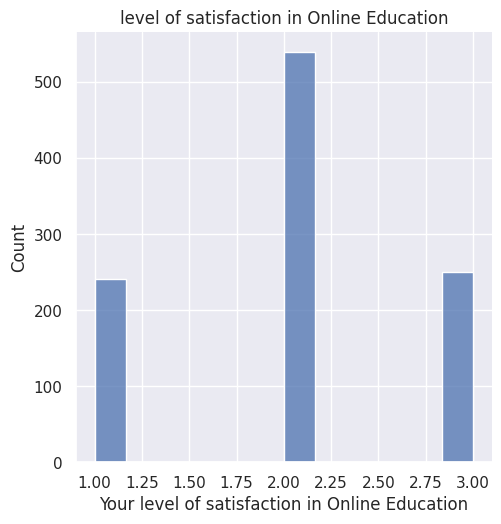

In [72]:
ax = sns.displot(Y_df).set(title='level of satisfaction in Online Education')

In [73]:
# Use the Kolmogorov-Smirnov test
from scipy.stats import kstest

for col in X_df.columns: # iteratre over each column
     # compare the column distribution to a normal distribution
    statistic, pval = kstest(X_df[col], "norm")
    print(f"column = {col}") 
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n")

column = Gender
p value = 1.2357510751860894e-238
Probably not normal


column = Home Location
p value = 1.2357510751860894e-238
Probably not normal


column = Level of Education
p value = 0.0
Probably not normal


column = Age(Years)
p value = 0.0
Probably not normal


column = Number of Subjects
p value = 0.0
Probably not normal


column = Economic status
p value = 0.0
Probably not normal


column = Family size
p value = 0.0
Probably not normal


column = Internet facility in your locality
p value = 0.0
Probably not normal


column = Are you involved in any sports?
p value = 1.2357510751860894e-238
Probably not normal


column = Do elderly people monitor you?
p value = 1.2357510751860894e-238
Probably not normal


column = Study time (Hours)
p value = 0.0
Probably not normal


column = Sleep time (Hours)
p value = 0.0
Probably not normal


column = Time spent on social media (Hours)
p value = 0.0
Probably not normal


column = Interested in Gaming?
p value = 1.2357510751860894e-238
P

In [74]:
# The output above shows that all values don't obey normal distribution

In [75]:
# Since all features are in same scale, so no need to rescale
X_df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,...,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,deviceType__Desktop,deviceType__Laptop,deviceType__Mobile,educationalPattern__Both,educationalPattern__Practical,educationalPattern__Theory
0,0,0,2,18,11,2,4,5,1,0,...,10,1,1,6,0,1,0,0,1,0
1,0,0,2,19,7,2,4,1,0,0,...,10,1,1,3,0,1,0,0,0,1
2,0,1,2,18,5,2,5,2,1,0,...,8,1,1,6,0,1,0,1,0,0
3,0,0,2,18,5,2,4,4,0,0,...,10,1,2,4,0,1,0,0,0,1
4,0,1,2,18,5,2,4,3,1,1,...,9,3,3,6,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1,1,2,19,3,2,6,5,0,0,...,10,4,4,8,0,0,1,0,0,1
1026,1,1,2,20,6,2,3,1,1,1,...,8,5,5,10,1,0,0,0,0,1
1027,1,1,2,20,3,2,3,2,1,1,...,8,2,2,6,0,0,1,0,0,1
1028,1,1,2,19,6,2,2,3,0,1,...,7,3,3,6,0,0,1,1,0,0


<Axes: >

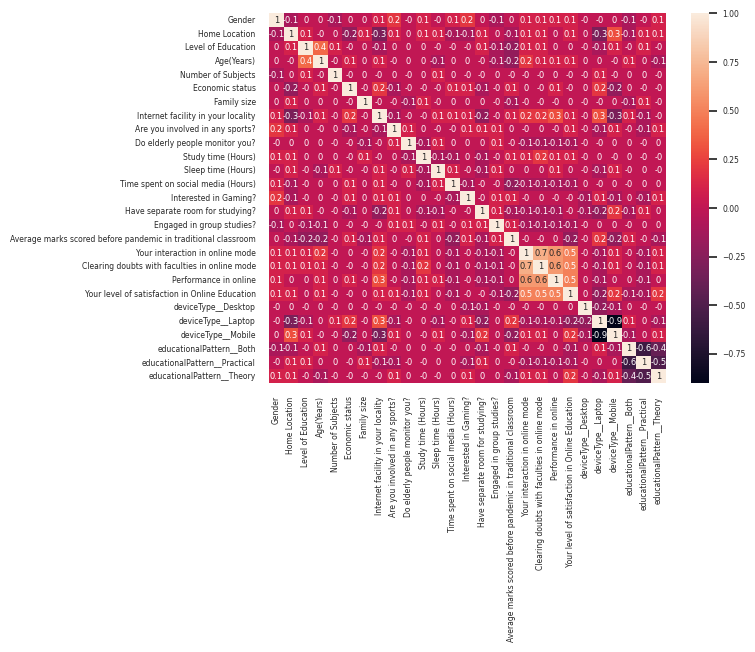

In [78]:
# calculate the correlation

# create a correlation matrix rounding to two decimal point
correlation_matrix = df.corr().round(1)

# print a correlation heat map
sns.set(font_scale=0.5) # Set the appropriate font size for display
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
'''
We measure this on a scale between -1 and 1: where -1 means perfective negative correlation, 1 means perfect positive correlation, 
0 means no correlation at all.

The correlation between 'deviceType_Laptop' and 'deviceType_Mobile' is 0.9, which is quite high.
And the absolute values of the correlation between them and Y value are both 0.2, so discard one of them arbitrarily to reduce the dimension
'''

In [79]:
df = df.drop(['deviceType__Laptop'], axis=1)
X_df = X_df.drop(['deviceType__Laptop'], axis=1)

In [ ]:
df.dtypes

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 



In [ ]:


# 加载数据集，假设X为特征矩阵，y为标签
X, y = load_dataset()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林分类器模型
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 训练模型
rfc.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rfc.predict(X_test)

# 计算模型性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 打印模型性能指标
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
